Summary saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/detailed_summary.csv


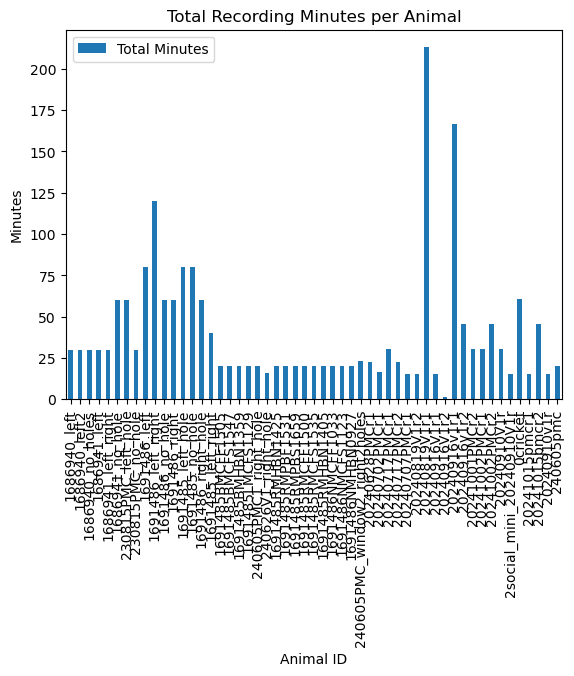

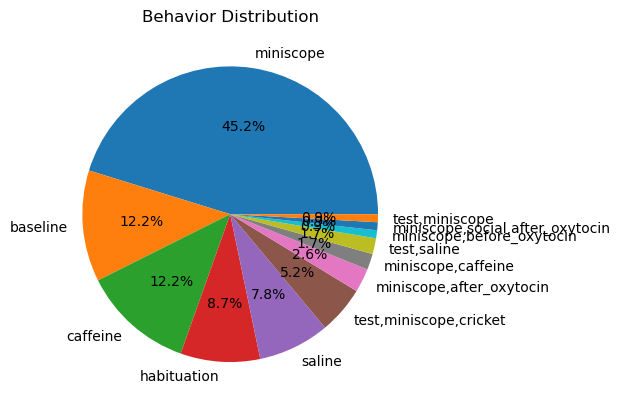

In [10]:
import os
import pandas as pd
from datetime import datetime, timedelta

# Load the CSV file
csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/sum2folder_condi_sep_manual_241124_final.csv"
# csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/241124_try2Oct3V1.csv"
data = pd.read_csv(csv_path)

# Folder structure for miniscope data
miniscope_folder = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted"

# Define bad miniscope recordings
bad_miniscope = {"202401015-PMC-r1", "20241002-PMC-R1", "20240717-PMC-r1"}

# Initialize results
total_minutes = 0
animals = {}
behaviors = set()

# Function to check if a similar time exists
def is_similar_time(csv_time, folder_time):
    """Check if two time points are within 10 minutes of each other."""
    fmt = "%H:%M"
    csv_time = datetime.strptime(csv_time, fmt)
    folder_time = datetime.strptime(folder_time, fmt)
    return abs((csv_time - folder_time).total_seconds()) <= 600  # 10 minutes tolerance

# Traverse miniscope folder
miniscope_records = []
for root, dirs, files in os.walk(miniscope_folder):
    if "My_V4_miniscope" in root:
        time_folder = os.path.basename(os.path.dirname(root))
        date_folder = os.path.basename(os.path.dirname(os.path.dirname(root)))
        animal_name = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(root))))
        miniscope_records.append((animal_name, date_folder, time_folder))

# Analyze the CSV data
for _, row in data.iterrows():
    animal = row["AnimalID"]
    condition = row["Condition"]
    date = row["date"]
    time = row["time"]
    recording_time = float(row["recording_time"]) / 60  # Convert seconds to minutes

    # Update total minutes
    total_minutes += recording_time

    # Initialize animal record if not present
    if animal not in animals:
        animals[animal] = {"total_minutes": 0, "behaviors": [], "miniscope": False, "bad": False}

    # Update animal data
    animals[animal]["total_minutes"] += recording_time
    animals[animal]["behaviors"].append((condition, recording_time))
    behaviors.add(condition)

    # Check for miniscope recordings
    for m_animal, m_date, m_time in miniscope_records:
        if animal in m_animal and date == m_date and is_similar_time(time, m_time):
            animals[animal]["miniscope"] = True
            if animal in bad_miniscope and int(date.split("_")[0]) >= 202410:
                animals[animal]["bad"] = True

# Summarize Results
report = []
for animal, details in animals.items():
    report.append({
        "AnimalID": animal,
        "Total Minutes": details["total_minutes"],
        "Behaviors": ", ".join(f"{cond} ({mins:.2f} min)" for cond, mins in details["behaviors"]),
        "Miniscope": "Yes" if details["miniscope"] else "No",
        "Bad Recording": "Yes" if details["bad"] else "No",
    })

# Create a DataFrame for visualization
summary_df = pd.DataFrame(report)

# Save to a CSV
summary_csv = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/detailed_summary.csv"
summary_df.to_csv(summary_csv, index=False)
print(f"Summary saved to {summary_csv}")

# Plot the data
import matplotlib.pyplot as plt

# Total minutes per animal
summary_df.plot(kind="bar", x="AnimalID", y="Total Minutes", title="Total Recording Minutes per Animal")
plt.ylabel("Minutes")
plt.xlabel("Animal ID")
plt.show()

# Pie chart for behaviors
behavior_counts = data["Condition"].value_counts()
behavior_counts.plot(kind="pie", title="Behavior Distribution", autopct="%1.1f%%")
plt.ylabel("")
plt.show()


Summary saved to /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/detailed_summary.csv


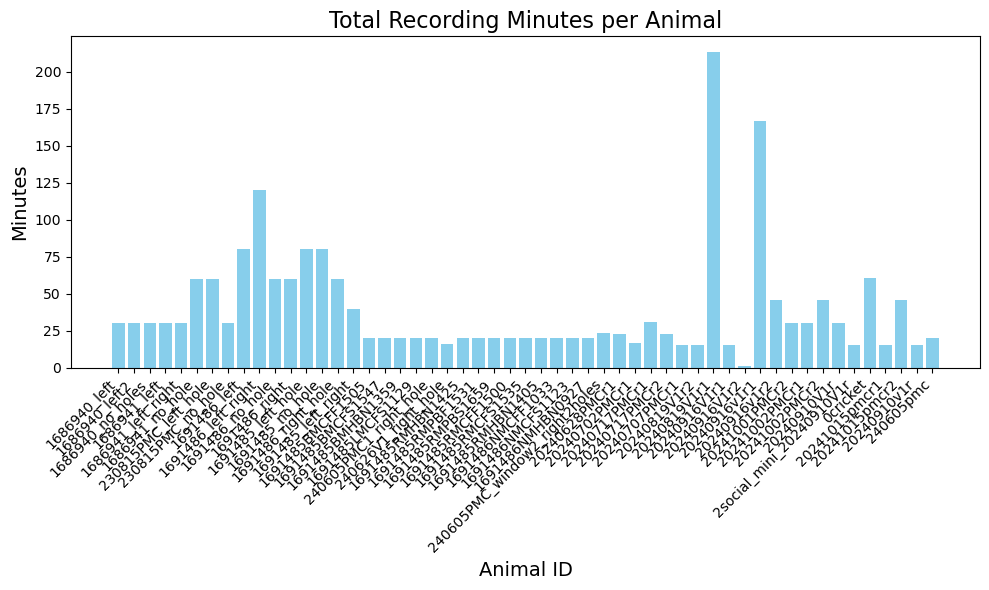

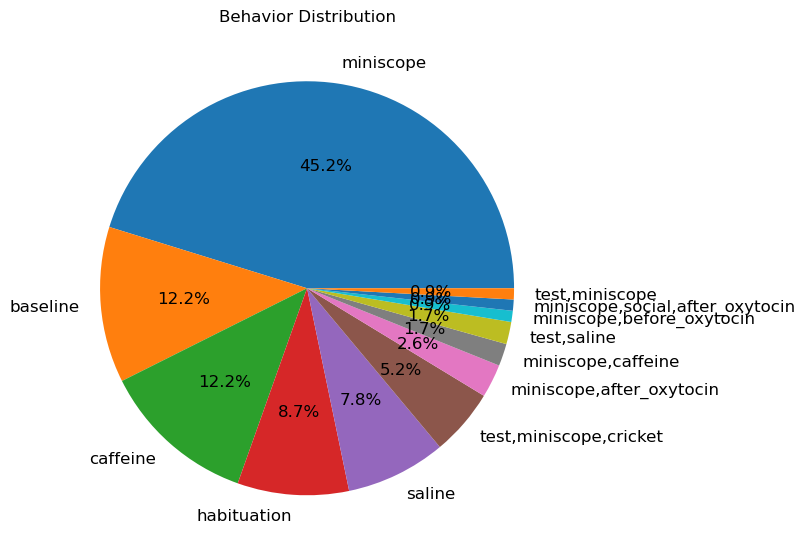

<Figure size 1200x600 with 0 Axes>

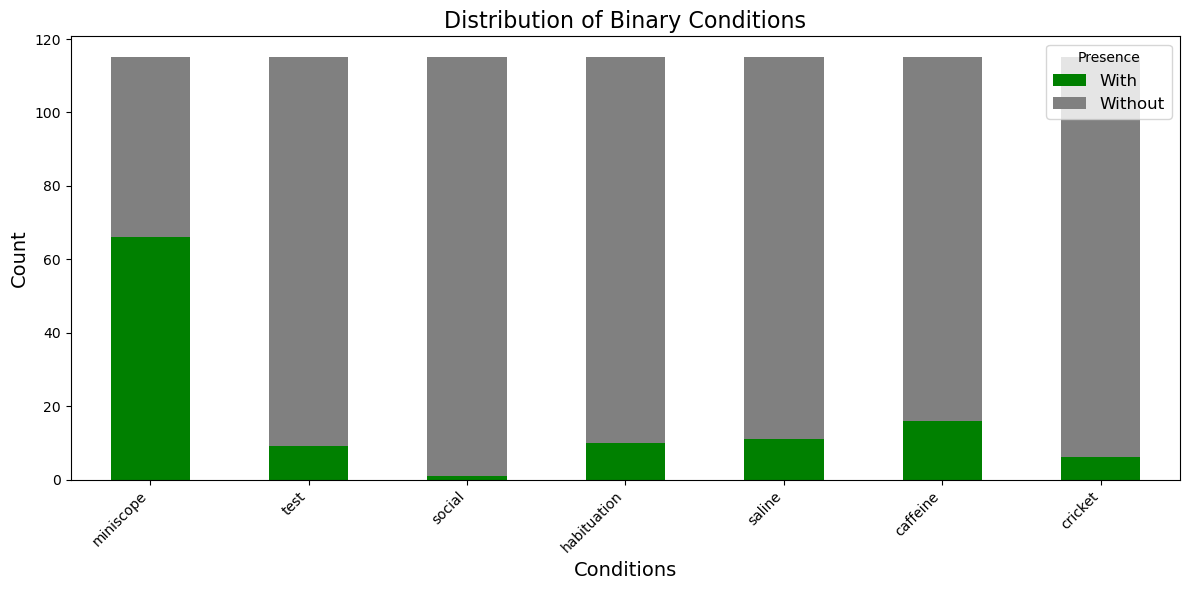

In [4]:
import os
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Paths for CSV and miniscope data
csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/sum2folder_condi_sep_manual_241124_final.csv"
miniscope_folder = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/Oct3V1mini_sorted"
summary_csv = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/detailed_summary.csv"

# Define bad miniscope recordings
bad_miniscope = {"202401015-PMC-r1", "20241002-PMC-R1", "20240717-PMC-r1"}

# Load CSV
data = pd.read_csv(csv_path)

# Initialize results
total_minutes = 0
animals = {}
behaviors = set()

# Helper function to check if times are similar
def is_similar_time(csv_time, folder_time):
    fmt = "%H:%M"
    csv_time = datetime.strptime(csv_time, fmt)
    folder_time = datetime.strptime(folder_time, fmt)
    return abs((csv_time - folder_time).total_seconds()) <= 600  # 10-minute tolerance

# Traverse miniscope folder and collect records
miniscope_records = []
for root, dirs, files in os.walk(miniscope_folder):
    if "My_V4_miniscope" in root:
        time_folder = os.path.basename(os.path.dirname(root))
        date_folder = os.path.basename(os.path.dirname(os.path.dirname(root)))
        animal_name = os.path.basename(os.path.dirname(os.path.dirname(os.path.dirname(root))))
        miniscope_records.append((animal_name, date_folder, time_folder))

# Analyze CSV data
for _, row in data.iterrows():
    animal = row["AnimalID"]
    condition = row["Condition"]
    date = row["date"]
    time = row["time"]
    recording_time = float(row["recording_time"]) / 60  # Convert seconds to minutes

    # Update total minutes
    total_minutes += recording_time

    # Initialize animal record if not present
    if animal not in animals:
        animals[animal] = {"total_minutes": 0, "behaviors": [], "miniscope": False, "bad": False}

    # Update animal data
    animals[animal]["total_minutes"] += recording_time
    animals[animal]["behaviors"].append((condition, recording_time))
    behaviors.add(condition)

    # Check for miniscope recordings
    for m_animal, m_date, m_time in miniscope_records:
        if animal in m_animal and date == m_date and is_similar_time(time, m_time):
            animals[animal]["miniscope"] = True
            if animal in bad_miniscope and int(date.split("_")[0]) >= 202410:
                animals[animal]["bad"] = True

# Summarize Results
report = []
for animal, details in animals.items():
    report.append({
        "AnimalID": animal,
        "Total Minutes": details["total_minutes"],
        "Behaviors": ", ".join(f"{cond} ({mins:.2f} min)" for cond, mins in details["behaviors"]),
        "Miniscope": "Yes" if details["miniscope"] else "No",
        "Bad Recording": "Yes" if details["bad"] else "No",
    })

# Create a summary DataFrame and save to CSV
summary_df = pd.DataFrame(report)
summary_df.to_csv(summary_csv, index=False)
print(f"Summary saved to {summary_csv}")

# Plot total minutes per animal
plt.figure(figsize=(10, 6))
plt.bar(summary_df["AnimalID"], summary_df["Total Minutes"], color="skyblue")
plt.title("Total Recording Minutes per Animal", fontsize=16)
plt.ylabel("Minutes", fontsize=14)
plt.xlabel("Animal ID", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Pie chart for behaviors
plt.figure(figsize=(8, 8))
behavior_counts = data["Condition"].value_counts()
behavior_counts.plot(kind="pie", title="Behavior Distribution", autopct="%1.1f%%", textprops={'fontsize': 12})
plt.ylabel("")
plt.tight_layout()
plt.show()

# Analyze binary fields
binary_fields = ["miniscope", "test", "social", "habituation", "saline", "caffeine", "cricket"]
binary_summary = {}
for field in binary_fields:
    total_with = data[field].astype(int).sum()
    total_without = len(data) - total_with
    binary_summary[field] = {"With": total_with, "Without": total_without}

binary_df = pd.DataFrame(binary_summary).T.reset_index()
binary_df.columns = ["Condition", "With", "Without"]

# Stacked bar chart for binary fields
plt.figure(figsize=(12, 6))
binary_df.set_index("Condition")[["With", "Without"]].plot(
    kind="bar", stacked=True, color=["green", "gray"], figsize=(12, 6)
)
plt.title("Distribution of Binary Conditions", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Conditions", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Presence", fontsize=12)
plt.tight_layout()
plt.show()


Filtered CSV saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/miniscope_only.csv


<Figure size 1200x800 with 0 Axes>

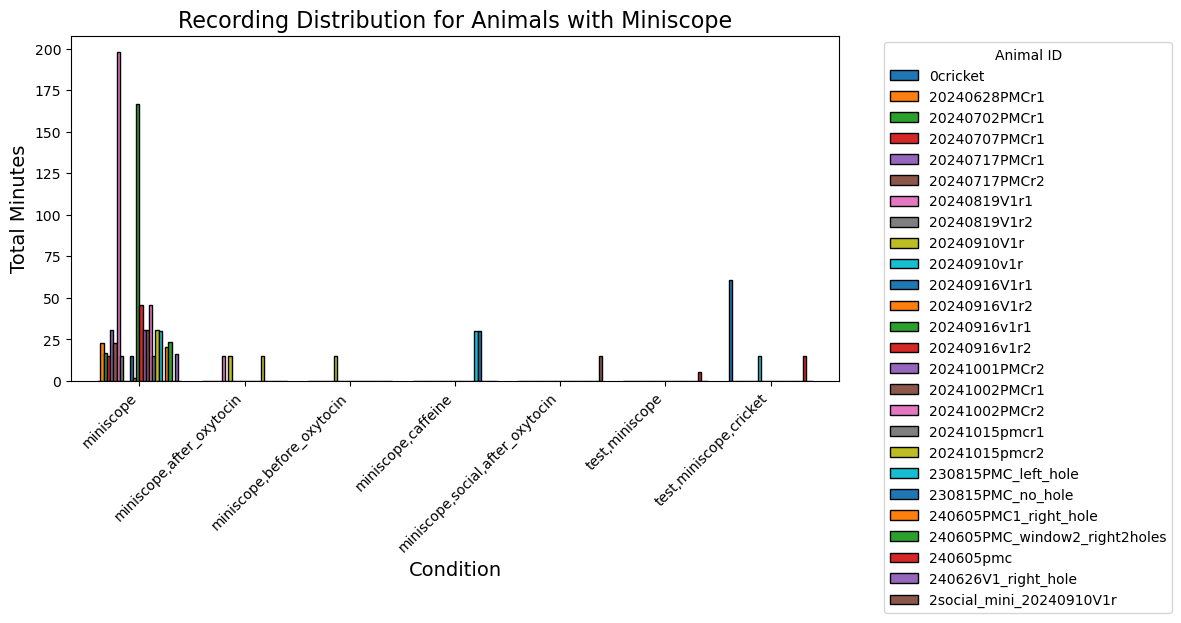

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/sum2folder_condi_sep_manual_241124_final.csv"
data = pd.read_csv(csv_path)

# Ensure `miniscope` is treated as a binary field (convert to integers if necessary)
data["miniscope"] = data["miniscope"].astype(int)

# Filter for animals with miniscope
miniscope_data = data[data["miniscope"] == 1]

# Save the filtered data for animals with miniscope
filtered_csv_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/miniscope_only.csv"
miniscope_data.to_csv(filtered_csv_path, index=False)
print(f"Filtered CSV saved to: {filtered_csv_path}")

# Summarize recording time for each animal and condition
summary = miniscope_data.groupby(["AnimalID", "Condition"])["recording_time"].sum() / 60  # Convert seconds to minutes
summary = summary.reset_index()  # Reset index for easier plotting

# Pivot table to make data suitable for grouped bar plotting
pivot_summary = summary.pivot(index="Condition", columns="AnimalID", values="recording_time").fillna(0)

# Plot the data
plt.figure(figsize=(12, 8))
pivot_summary.plot(kind="bar", figsize=(12, 6), width=0.8, edgecolor="black")
plt.title("Recording Distribution for Animals with Miniscope", fontsize=16)
plt.ylabel("Total Minutes", fontsize=14)
plt.xlabel("Condition", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Animal ID", fontsize=10, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


Detailed summary saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/miniscope_detailed_summary.csv


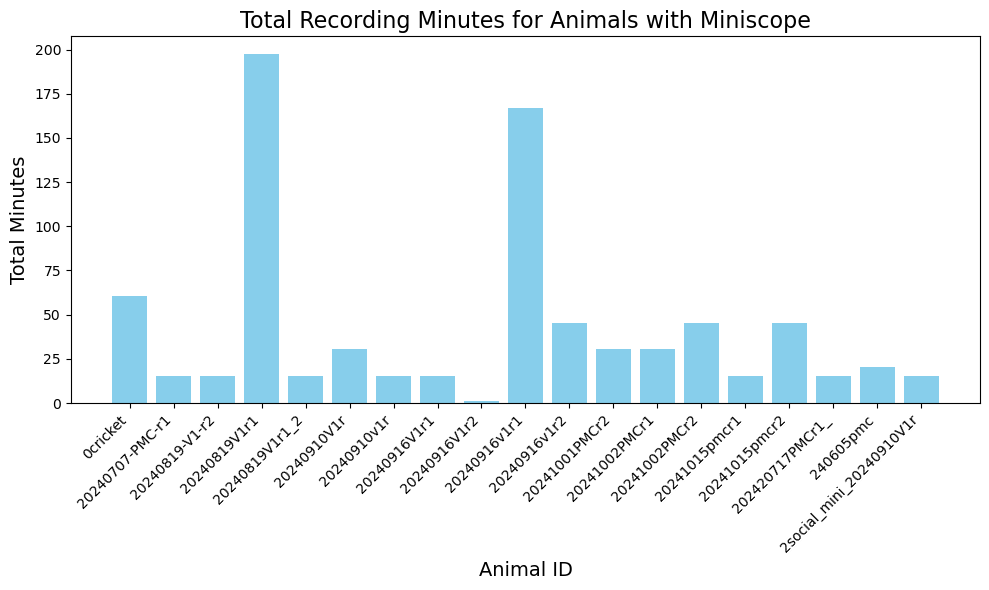

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
# csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/sum2folder_condi_sep_manual_241124_final.csv"
csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/241124_try2Oct3V1.csv"
data = pd.read_csv(csv_path)

# Ensure `miniscope` is treated as a binary field (convert to integers if necessary)
data["miniscope"] = data["miniscope"].astype(int)

# Filter for animals with miniscope
miniscope_data = data[data["miniscope"] == 1]

# Summarize data
summary = []
for animal_id, group in miniscope_data.groupby("AnimalID"):
    # Total minutes
    total_minutes = group["recording_time"].sum() / 60  # Convert seconds to minutes

    # Collect behaviors
    behaviors = []
    for _, row in group.iterrows():
        condition = row["Condition"]
        minutes = row["recording_time"] / 60
        behaviors.append(f"{condition} ({minutes:.2f} min)")
    behaviors_summary = ", ".join(behaviors)

    # Bad recording status (if the animal is in a predefined bad recording set)
    bad_recording = "Yes" if animal_id in {"202401015-PMC-r1", "20241002-PMC-R1", "20240717-PMC-r1"} else "No"

    # Append to summary
    summary.append({
        "AnimalID": animal_id,
        "Total Minutes": total_minutes,
        "Behaviors": behaviors_summary,
        "Miniscope": "Yes",
        "Bad Recording": bad_recording,
    })

# Create a DataFrame for the summary
summary_df = pd.DataFrame(summary)

# Save the detailed summary to a CSV file
summary_csv_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/miniscope_detailed_summary.csv"
summary_df.to_csv(summary_csv_path, index=False)
print(f"Detailed summary saved to: {summary_csv_path}")

# Optional: Plot a bar chart of total minutes per animal
plt.figure(figsize=(10, 6))
plt.bar(summary_df["AnimalID"], summary_df["Total Minutes"], color="skyblue")
plt.title("Total Recording Minutes for Animals with Miniscope", fontsize=16)
plt.ylabel("Total Minutes", fontsize=14)
plt.xlabel("Animal ID", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


Detailed summary saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/only_good_miniscope_detailed_summary.csv


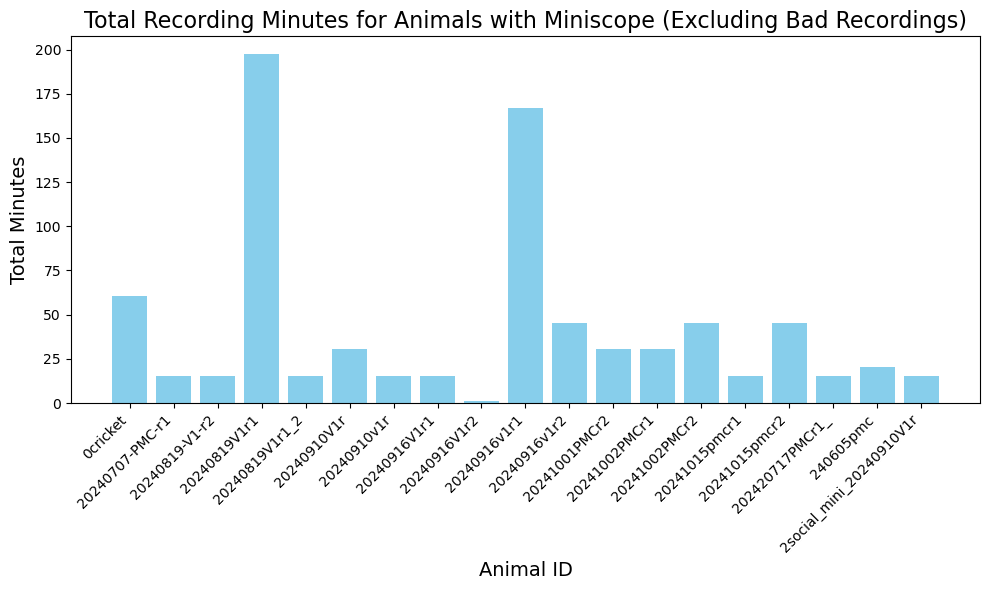

Total minutes recorded for all miniscope animals: 795.94 minutes


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
csv_path = "/hpc/group/tdunn/lq53/dappy_24_nov/mir_modif_dappy/meta_datas/241124_try2Oct3V1.csv"
data = pd.read_csv(csv_path)

# Ensure `miniscope` is treated as a binary field
data["miniscope"] = data["miniscope"].astype(int)

# Filter for animals with miniscope
miniscope_data = data[data["miniscope"] == 1]

# List of bad recordings
bad_recordings = {"202401015-PMC-r1", "20241002-PMC-R1", "20240717-PMC-r1"}

# Summarize data
summary = []
total_minutes_all = 0  # Variable to track total minutes for all miniscope recordings
for animal_id, group in miniscope_data.groupby("AnimalID"):
    # Total minutes
    total_minutes = group["recording_time"].sum() / 60  # Convert seconds to minutes
    total_minutes_all += total_minutes  # Add to total minutes

    # Collect behaviors
    behaviors = []
    for _, row in group.iterrows():
        condition = row["Condition"]
        minutes = row["recording_time"] / 60
        behaviors.append(f"{condition} ({minutes:.2f} min)")
    behaviors_summary = ", ".join(behaviors)

    # Determine if this is a bad recording
    bad_recording = animal_id in bad_recordings

    # Append to summary
    summary.append({
        "AnimalID": animal_id,
        "Total Minutes": total_minutes,
        "Behaviors": behaviors_summary,
        "Bad Recording": "Yes" if bad_recording else "No",
    })

# Create a DataFrame for the summary
summary_df = pd.DataFrame(summary)

# Save the detailed summary to a CSV file, excluding "Miniscope" and "Bad Recording" if needed
final_summary_csv_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/only_good_miniscope_detailed_summary.csv"
summary_df[["AnimalID", "Total Minutes", "Behaviors"]].to_csv(final_summary_csv_path, index=False)
print(f"Detailed summary saved to: {final_summary_csv_path}")

# Filter out bad recordings for plotting
filtered_summary_df = summary_df[summary_df["Bad Recording"] == "No"]

# Plot a bar chart of total minutes per animal (excluding bad recordings)
plt.figure(figsize=(10, 6))
plt.bar(filtered_summary_df["AnimalID"], filtered_summary_df["Total Minutes"], color="skyblue")
plt.title("Total Recording Minutes for Animals with Miniscope (Excluding Bad Recordings)", fontsize=16)
plt.ylabel("Total Minutes", fontsize=14)
plt.xlabel("Animal ID", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# Print total minutes for all miniscope recordings
print(f"Total minutes recorded for all miniscope animals: {total_minutes_all:.2f} minutes")


Total Minutes for Conditions of Interest (Including No Condition):
after_oxytocin: 60.70 minutes
social: 15.17 minutes
cricket: 91.04 minutes
no_condition: 871.35 minutes
Condition summary saved to: /hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/condition_summary_with_no_condition.csv


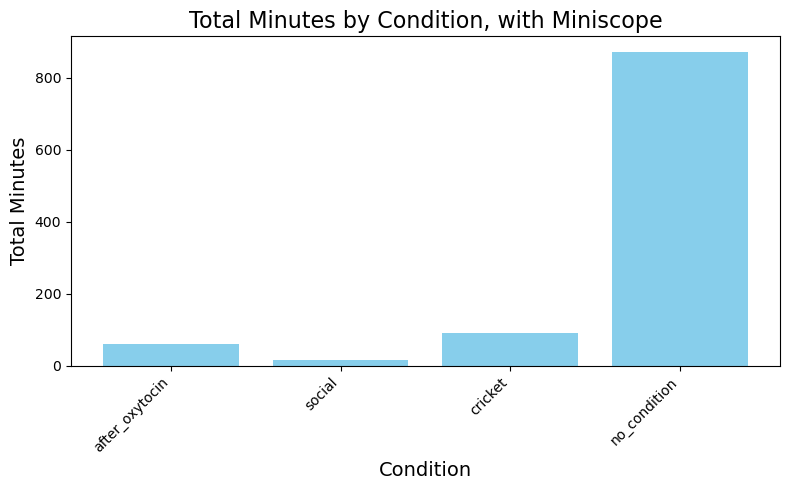

In [7]:
# Define conditions of interest
conditions_of_interest = ["after_oxytocin", "social", "cricket"]

# Summarize total minutes for each condition
condition_summary = {}
for condition in conditions_of_interest:
    total_minutes = miniscope_data[miniscope_data[condition] == 1]["recording_time"].sum() / 60  # Convert seconds to minutes
    condition_summary[condition] = total_minutes

# Calculate "no condition" minutes
no_condition_minutes = miniscope_data[
    miniscope_data[conditions_of_interest].sum(axis=1) == 0  # Rows where all conditions are 0
]["recording_time"].sum() / 60  # Convert seconds to minutes
condition_summary["no_condition"] = no_condition_minutes

# Display the summary
print("Total Minutes for Conditions of Interest (Including No Condition):")
for condition, minutes in condition_summary.items():
    print(f"{condition}: {minutes:.2f} minutes")

# Optional: Save the summary to a CSV
condition_summary_df = pd.DataFrame(list(condition_summary.items()), columns=["Condition", "Total Minutes"])
condition_csv_path = "/hpc/group/tdunn/Bryan_Rigs/BigOpenField/24_summ_cont/sum_data/condition_summary_with_no_condition.csv"
condition_summary_df.to_csv(condition_csv_path, index=False)
print(f"Condition summary saved to: {condition_csv_path}")

# Optional: Plot a bar chart for total minutes by condition
plt.figure(figsize=(8, 5))
plt.bar(condition_summary.keys(), condition_summary.values(), color="skyblue")
plt.title("Total Minutes by Condition, with Miniscope", fontsize=16)
plt.ylabel("Total Minutes", fontsize=14)
plt.xlabel("Condition", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
